-----------------------------------
### Mastering Sequence modeling - RNN explained

-------------------------------------

-  Get Insight into text classification using RNN  
    - How `hidden states` are used as `input` to the `final classifier layer`
- Lecture # 05

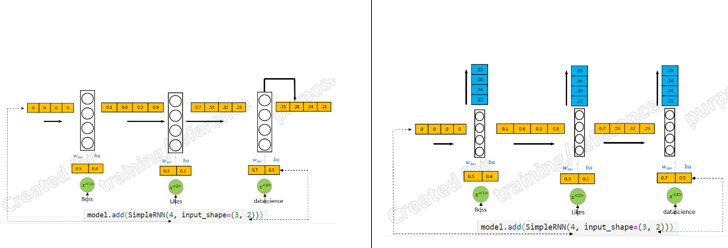

`(Left side - diagram)`
- the hidden state is being computed at each of the time step by taking
    - current input
    - preceding activation
- at the last time step the hidden state will represent the entire sequence of the input    
- this information can then be associated with labels (target) for classification type problems

`(Right side - diagram)`
- When dealing with `sequence-to-sequence` models, setting `return_sequences=True` is often necessary for the encoder part of the model. 
- example of `machine translation`, where the goal is to translate a sentence from one language to another. 

**Outline**

In the context of text classification, the hidden states of the RNN serve as rich representations of the input sequence. These representations encapsulate the learned information about the sequential patterns and dependencies present in the text. The final classifier layer utilizes these hidden states as inputs for making predictions. By leveraging the encoded information in the hidden states, the classifier can discern the relevant features and patterns necessary for accurate categorization. This approach enables the RNN to learn and generalize from the sequential structure of the input text, making it particularly effective for tasks such as sentiment analysis, document classification, and topic categorization. Overall, the integration of hidden states in the final classifier layer enhances the model's ability to capture nuanced contextual information, resulting in improved performance in text classification tasks.

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import SimpleRNN, Dense, Input

In [13]:
# Define input data
nbr_samples   = 8
nbr_timesteps = 3
nbr_features  = 2  # Change this to 2

inputs = np.random.random([nbr_samples, nbr_timesteps, nbr_features]).astype(np.float32)

In [14]:
inputs

array([[[0.252003  , 0.9428342 ],
        [0.22772929, 0.07103631],
        [0.9267143 , 0.43528157]],

       [[0.42516625, 0.82366735],
        [0.00312502, 0.58960044],
        [0.8828917 , 0.3180021 ]],

       [[0.7750403 , 0.02890864],
        [0.6228853 , 0.082804  ],
        [0.3528616 , 0.80787385]],

       [[0.93125314, 0.38449168],
        [0.4235317 , 0.9120327 ],
        [0.3110971 , 0.19167154]],

       [[0.5269871 , 0.8063533 ],
        [0.12077792, 0.12223533],
        [0.4560359 , 0.908387  ]],

       [[0.45155197, 0.26207978],
        [0.38085455, 0.62042326],
        [0.8538065 , 0.84551966]],

       [[0.9628495 , 0.31742263],
        [0.9954407 , 0.2112187 ],
        [0.42626855, 0.2461772 ]],

       [[0.8933285 , 0.17336942],
        [0.72745615, 0.7589263 ],
        [0.74945277, 0.01867418]]], dtype=float32)

In [15]:
# Define the input layer with batch size specification
input_layer = Input(batch_shape=(1, nbr_timesteps, nbr_features))

In [16]:
# Setup the SimpleRNN layer for binary classification with 5 units
units = 5
rnn_output, final_state = SimpleRNN(units, 
                                    return_sequences=False, 
                                    return_state    =True, 
                                    stateful        =False)(input_layer)

In [17]:
# Create a model to extract hidden states
hidden_states_model = Model(inputs=input_layer, outputs=rnn_output)

In [18]:
# Display the model summary
hidden_states_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(1, 3, 2)]               0         
                                                                 
 simple_rnn_2 (SimpleRNN)    [(1, 5),                  40        
                              (1, 5)]                            
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the hidden states model (not necessary for prediction, but done to avoid warnings)
hidden_states_model.compile(optimizer='adam', loss='mse')

In [20]:
# Iterate through each sample for each epoch
epochs = 1

for epoch in range(epochs):
    
    for sample_idx in range(nbr_samples):
        # Dummy label for the purpose of the example
        label = np.array([np.random.randint(2)])
        
        # Train the model (not training here, just to show the effect on hidden states)
        hidden_states_model.train_on_batch(inputs[sample_idx:sample_idx+1], label)
        
        # Get the hidden states for the input data
        hidden_states = hidden_states_model.predict(inputs[sample_idx:sample_idx+1], batch_size=1)
        
        print(f"\nHidden States after processing {sample_idx + 1} samples in epoch {epoch + 1}:\n{hidden_states}")

1/1 [==============================] - 0s 364ms/step

Hidden States after processing 1 samples in epoch 1:
[[ 0.6315959  -0.04067693  0.71328664 -0.5798432   0.4599099 ]]
1/1 [==============================] - 0s 21ms/step

Hidden States after processing 2 samples in epoch 1:
[[ 0.4433155   0.047114    0.6907248  -0.7615518   0.09027744]]
1/1 [==============================] - 0s 28ms/step

Hidden States after processing 3 samples in epoch 1:
[[ 0.19053374 -0.60898846  0.53517544 -0.6875458   0.6267741 ]]
1/1 [==============================] - 0s 21ms/step

Hidden States after processing 4 samples in epoch 1:
[[-0.31149173 -0.32534945  0.69643056 -0.7597355  -0.15009072]]
1/1 [==============================] - 0s 24ms/step

Hidden States after processing 5 samples in epoch 1:
[[ 0.41914943 -0.24268803  0.6875315  -0.5368728   0.71380895]]
1/1 [==============================] - 0s 18ms/step

Hidden States after processing 6 samples in epoch 1:
[[ 0.5632309  -0.5987226   0.57885617 -0.86

|sample | label|
|-------| -----|
|[ 0.6315959  -0.04067693  0.71328664 -0.5798432   0.4599099 ]| Pos |
|[ 0.4433155   0.047114    0.6907248  -0.7615518   0.09027744]| Pos |
|[ 0.19053374 -0.60898846  0.53517544 -0.6875458   0.6267741 ]| ..  |
|[-0.31149173 -0.32534945  0.69643056 -0.7597355  -0.15009072]| Pos |
|[ 0.41914943 -0.24268803  0.6875315  -0.5368728   0.71380895]| Neg |
..
..
|[-0.0130232  -0.31753317  0.67603105 -0.83641464 -0.28301638]| Neg|

- Above example holds true if we use only the final hidden state of the sequence.

does not apply if we add
- Average or max-pool the hidden states over all time steps.
- Apply some other aggregation mechanism.

#### Next
- we will see how a classification problem is setup using `Keras (SimpleRNN)`